In [50]:
# import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [55]:
parsed_records = []
current_record = {}

# Open and read the file line by line
with open('Battles_N.txt', 'r') as file:
    for line in file:
        line = line.strip()
        
        # Skip empty lines
        if not line:
            continue
        
        if line.startswith('BATTLE:'):
            if current_record:
                parsed_records.append(current_record)
                
            # Start a new record
            current_record = {'BATTLE': line.split(' ')[1]}
        
        else:
            fields = line.split('\t')
            
            for field in fields:
                if ':' in field:
                    key, value = field.split(':', 1)
                    key = key.strip()
                    value = value.strip()
                    
                    current_record[key] = value

if current_record:
    parsed_records.append(current_record)

battles_df = pd.DataFrame(parsed_records)

battles_df.head()

,BATTLE,Sector,Terrain Type,Coordinates,Advantage,Terran Marines,Terran Marauders,Protoss Sentries,Protoss Zealots,Terran Attack-Defense Start Strength,Protoss Attack-Defense Start Strength,Terran Attack-Defense End Strength,Protoss Attack-Defense End Strength,Surviving Terran Marines,Surviving Terran Marauders,Surviving Protoss Sentries,Surviving Protoss Zealots,Winner,Loser
0,B-1,Beta,Forested,"64,61",Terran,10,3,0,8,"(219.15, 362.7)","(45.0, 75.6)","(230.94, 392.18)","(48.12, 67.78)",10,3,0,8,Terran,Protoss
1,B-2,Gamma,Open,"77,94",Terran,6,3,3,0,"(165.15, 272.7)","(105.0, 180.0)","(166.84, 253.87)","(0, 0)",5,3,0,0,Terran,Protoss
2,B-3,Gamma,Urban,"38,38",Protoss,6,4,15,3,"(193.2, 318.6)","(541.88, 928.35)","(153.3, 153.96)","(12.4, 26.79)",2,4,0,3,Terran,Protoss
3,B-4,Alpha,Rocky,"71,46",Terran,0,5,10,8,"(140.25, 229.5)","(395.0, 675.6)","(86.84, 158.26)","(101.33, 126.1)",0,4,1,8,Protoss,Terran
4,B-5,Beta,Rocky,"92,67",Protoss,3,5,6,9,"(180.75, 297.0)","(260.62, 445.05)","(147.42, 189.3)","(61.92, 104.99)",1,5,1,9,Terran,Protoss


In [57]:
battles_df.columns

Index(['BATTLE', 'Sector', 'Terrain Type', 'Coordinates', 'Advantage',
       'Terran Marines', 'Terran Marauders', 'Protoss Sentries',
       'Protoss Zealots', 'Terran Attack-Defense Start Strength',
       'Protoss Attack-Defense Start Strength',
       'Terran Attack-Defense End Strength',
       'Protoss Attack-Defense End Strength', 'Surviving Terran Marines',
       'Surviving Terran Marauders', 'Surviving Protoss Sentries',
       'Surviving Protoss Zealots', 'Winner', 'Loser'],
      dtype='object')

### Task 1

BATTLE SECTOR ANALYSIS
--------------------------------------------------------------------------------
Sector          Battles    Terran Wins     Protoss Wins   
--------------------------------------------------------------------------------
Alpha           1232       1086            146            
Beta            1262       1124            138            
Delta           1239       1109            130            
Gamma           1267       1125            142            
--------------------------------------------------------------------------------


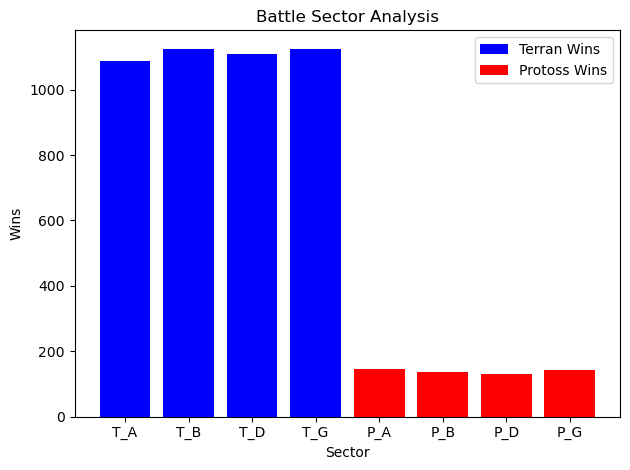

In [60]:
import matplotlib.pyplot as plt

battles_df['Terran Wins'] = battles_df['Winner'].apply(lambda x: 1 if x == 'Terran' else 0)
battles_df['Protoss Wins'] = battles_df['Winner'].apply(lambda x: 1 if x == 'Protoss' else 0)


sector_wins = battles_df.groupby('Sector').agg({
    'Terran Wins': 'sum',
    'Protoss Wins': 'sum',
    'BATTLE': 'count'  
}).reset_index()


sector_wins['Terran Win Percentage'] = (sector_wins['Terran Wins'] / sector_wins['BATTLE']) * 100
sector_wins['Protoss Win Percentage'] = (sector_wins['Protoss Wins'] / sector_wins['BATTLE']) * 100

# BATTLE SECTOR ANALYSIS 
print("BATTLE SECTOR ANALYSIS")
print("-" * 80)
print(f"{'Sector':<15} {'Battles':<10} {'Terran Wins':<15} {'Protoss Wins':<15}")
print("-" * 80)
for index, row in sector_wins.iterrows():
    print(f"{row['Sector']:<15} {row['BATTLE']:<10} {row['Terran Wins']:<15} {row['Protoss Wins']:<15}")
print("-" * 80)

# Plotting
sectors = sector_wins['Sector'].tolist()
terr_wins = sector_wins['Terran Wins'].tolist()
prot_wins = sector_wins['Protoss Wins'].tolist()

fig, ax = plt.subplots()

ax.bar([f"T_{s[0]}" for s in sectors], terr_wins, color='blue', label='Terran Wins')
ax.bar([f"P_{s[0]}" for s in sectors], prot_wins, color='red', label='Protoss Wins')  # Stacked bar chart

ax.set_ylabel('Wins')
ax.set_xlabel('Sector')
ax.set_title('Battle Sector Analysis')
ax.legend()

plt.tight_layout()
plt.show()

## Task 2

BATTLE TERRAIN ANALYSIS
Terrain	Battles	Terran Loses	Protoss Loses
Forested	1265	157		1108
Open	1217	122		1095
Rocky	1287	126		1161
Urban	1231	151		1080
Total Battles: 5000

Terran Loss Percentage By Terrain
Forested: 12.41%
Open: 10.02%
Rocky: 9.79%
Urban: 12.27%

Protoss Loss Percentage By Terrain
Forested: 87.59%
Open: 89.98%
Rocky: 90.21%
Urban: 87.73%



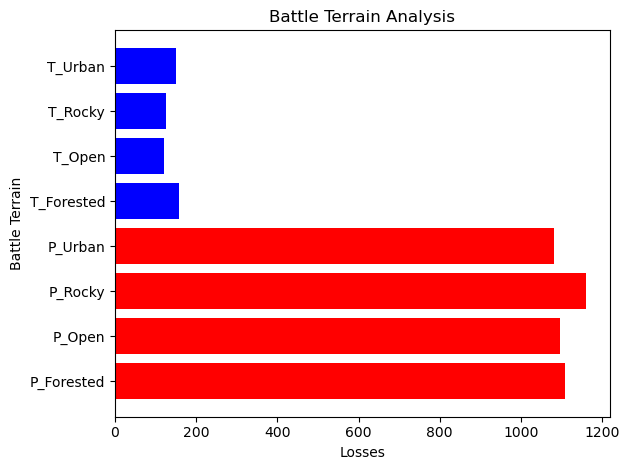

In [62]:
terrain_battle_counts = battles_df['Terrain Type'].value_counts().to_dict()

battles_df['Terran Loses'] = battles_df['Loser'].apply(lambda x: 1 if x == 'Terran' else 0)
battles_df['Protoss Loses'] = battles_df['Loser'].apply(lambda x: 1 if x == 'Protoss' else 0)
terrain_losses = battles_df.groupby('Terrain Type').agg({
    'Terran Loses': 'sum',
    'Protoss Loses': 'sum'
}).reset_index()

terrain_losses['Total Battles'] = terrain_losses['Terrain Type'].map(terrain_battle_counts)
terrain_losses['Terran Loss Percentage'] = (terrain_losses['Terran Loses'] / terrain_losses['Total Battles']) * 100
terrain_losses['Protoss Loss Percentage'] = (terrain_losses['Protoss Loses'] / terrain_losses['Total Battles']) * 100

print("BATTLE TERRAIN ANALYSIS")
print("Terrain\tBattles\tTerran Loses\tProtoss Loses")
for index, row in terrain_losses.iterrows():
    print(f"{row['Terrain Type']}\t{row['Total Battles']}\t{row['Terran Loses']}\t\t{row['Protoss Loses']}")
print(f"Total Battles: {terrain_losses['Total Battles'].sum()}\n")

print("Terran Loss Percentage By Terrain")
for index, row in terrain_losses.iterrows():
    print(f"{row['Terrain Type']}: {row['Terran Loss Percentage']:.2f}%")
print()

print("Protoss Loss Percentage By Terrain")
for index, row in terrain_losses.iterrows():
    print(f"{row['Terrain Type']}: {row['Protoss Loss Percentage']:.2f}%")
print()


labels = [f"P_{row['Terrain Type']}" for _, row in terrain_losses.iterrows()] + \
         [f"T_{row['Terrain Type']}" for _, row in terrain_losses.iterrows()]
losses = terrain_losses['Protoss Loses'].tolist() + terrain_losses['Terran Loses'].tolist()

colors = ['red'] * len(terrain_losses) + ['blue'] * len(terrain_losses)

plt.barh(labels, losses, color=colors)

plt.title("Battle Terrain Analysis")
plt.xlabel("Losses")
plt.ylabel("Battle Terrain")
plt.tight_layout()
plt.show()

## Task 3

BATTLE ADVANTAGE ANALYSIS
Terran Advantage Win           1970
Terran Advantage Loss          480
Terran Advantage Battles:      2450

Protoss Advantage Win          76
Protoss Advantage Loss         2474
Protoss Advantage Battles:     2550

Total Battles:                 5000

Win Probability Terran Advantage: 80.41%
Win Probability Protoss Advantage: 2.98%


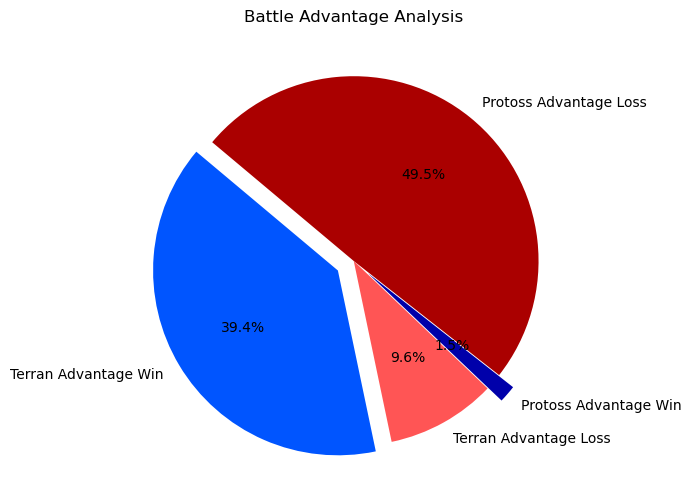

In [64]:
terran_advantage_win = len(battles_df[(battles_df['Advantage'] == 'Terran') & (battles_df['Winner'] == 'Terran')])
terran_advantage_loss = len(battles_df[(battles_df['Advantage'] == 'Terran') & (battles_df['Winner'] == 'Protoss')])
protoss_advantage_win = len(battles_df[(battles_df['Advantage'] == 'Protoss') & (battles_df['Winner'] == 'Protoss')])
protoss_advantage_loss = len(battles_df[(battles_df['Advantage'] == 'Protoss') & (battles_df['Winner'] == 'Terran')])

terran_battles = terran_advantage_win + terran_advantage_loss
protoss_battles = protoss_advantage_win + protoss_advantage_loss
total_battles = terran_battles + protoss_battles

terran_win_prob = (terran_advantage_win / terran_battles) * 100
protoss_win_prob = (protoss_advantage_win / protoss_battles) * 100

# display the results
analysis = f"""BATTLE ADVANTAGE ANALYSIS
Terran Advantage Win           {terran_advantage_win}
Terran Advantage Loss          {terran_advantage_loss}
Terran Advantage Battles:      {terran_battles}

Protoss Advantage Win          {protoss_advantage_win}
Protoss Advantage Loss         {protoss_advantage_loss}
Protoss Advantage Battles:     {protoss_battles}

Total Battles:                 {total_battles}

Win Probability Terran Advantage: {terran_win_prob:.2f}%
Win Probability Protoss Advantage: {protoss_win_prob:.2f}%"""

print(analysis)

# plot
labels = ['Terran Advantage Win', 'Terran Advantage Loss', 'Protoss Advantage Win', 'Protoss Advantage Loss']
sizes = [terran_advantage_win, terran_advantage_loss, protoss_advantage_win, protoss_advantage_loss]
colors = ['#0055ff', '#ff5555', '#0000aa', '#aa0000']
explode = (0.1, 0, 0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Battle Advantage Analysis")
plt.show()

## Task 4

TOTAL FORCE ANALYSIS

Terran Marines Total Strength: 24841
Terran Marauders Total Strength: 25260
Total Terran Strength (All Battles): 50101
Terran Marines Average Strength Per Battle: 4.97
Terran Marauders Average Strength Per Battle: 5.05
Terran Marines Maximum Strength In Any Battle: 13
Terran Marauders Maximum Strength In Any Battle: 14
Terran Marines Minimum Strength In Any Battle: 0
Terran Marauders Minimum Strength In Any Battle: 0

Protoss Sentries Total Strength: 26304
Protoss Zealots Total Strength: 26558
Total Protoss Strength (All Battles): 52862
Protoss Sentry Average Strength Per Battle: 5.26
Protoss Zealot Average Strength Per Battle: 5.31
Protoss Sentry Maximum Strength In Any Battle: 16
Protoss Zealot Maximum Strength In Any Battle: 15
Protoss Sentry Minimum Strength In Any Battle: 0
Protoss Zealot Minimum Strength In Any Battle: 0

Total Battles: 5000


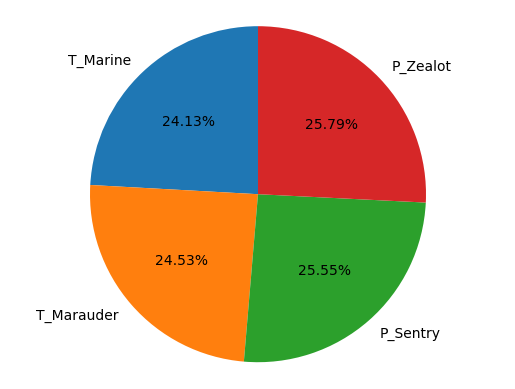

In [67]:
columns_to_check = ['Terran Marines', 'Terran Marauders', 'Protoss Sentries', 'Protoss Zealots']

for column in columns_to_check:
    try:
        battles_df[column].astype(float)
    except ValueError:
        print(f"Column '{column}' contains non-numeric values.")

median_values = battles_df[columns_to_check].median()
battles_df[columns_to_check] = battles_df[columns_to_check].apply(pd.to_numeric, errors='coerce')
battles_df.fillna(median_values, inplace=True)

total_marines_strength = battles_df['Terran Marines'].sum()
total_marauders_strength = battles_df['Terran Marauders'].sum()

# Protoss
total_sentries_strength = battles_df['Protoss Sentries'].sum()
total_zealots_strength = battles_df['Protoss Zealots'].sum()


num_battles = len(battles_df)
avg_marines = total_marines_strength / num_battles 
avg_marauders = total_marauders_strength / num_battles
avg_sentries = total_sentries_strength / num_battles
avg_zealots = total_zealots_strength / num_battles

max_values = battles_df[columns_to_check].max()
min_values = battles_df[columns_to_check].min()

print(f"TOTAL FORCE ANALYSIS\n")
print(f"Terran Marines Total Strength: {total_marines_strength}")
print(f"Terran Marauders Total Strength: {total_marauders_strength}")
print(f"Total Terran Strength (All Battles): {total_marines_strength + total_marauders_strength}")
print(f"Terran Marines Average Strength Per Battle: {avg_marines:.2f}")
print(f"Terran Marauders Average Strength Per Battle: {avg_marauders:.2f}")
print(f"Terran Marines Maximum Strength In Any Battle: {max_values['Terran Marines']}")
print(f"Terran Marauders Maximum Strength In Any Battle: {max_values['Terran Marauders']}")
print(f"Terran Marines Minimum Strength In Any Battle: {min_values['Terran Marines']}")
print(f"Terran Marauders Minimum Strength In Any Battle: {min_values['Terran Marauders']}")
print(f"\nProtoss Sentries Total Strength: {total_sentries_strength}")
print(f"Protoss Zealots Total Strength: {total_zealots_strength}")
print(f"Total Protoss Strength (All Battles): {total_sentries_strength + total_zealots_strength}")
print(f"Protoss Sentry Average Strength Per Battle: {avg_sentries:.2f}")
print(f"Protoss Zealot Average Strength Per Battle: {avg_zealots:.2f}")
print(f"Protoss Sentry Maximum Strength In Any Battle: {max_values['Protoss Sentries']}")
print(f"Protoss Zealot Maximum Strength In Any Battle: {max_values['Protoss Zealots']}")
print(f"Protoss Sentry Minimum Strength In Any Battle: {min_values['Protoss Sentries']}")
print(f"Protoss Zealot Minimum Strength In Any Battle: {min_values['Protoss Zealots']}")
print(f"\nTotal Battles: {num_battles}")

# Plotting pie chart
labels = ['T_Marine', 'T_Marauder', 'P_Sentry', 'P_Zealot']
sizes = [total_marines_strength, total_marauders_strength, total_sentries_strength, total_zealots_strength]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
ax1.axis('equal')
plt.show()
